In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from implementation import NeuralNet
import pandas as pd
np.random.seed(0)

In [2]:
#for input from CSV file.
# data = np.genfromtxt("../data/train.csv", delimiter=",", skip_header=1, dtype=int)
# labels = data[:,0]
# images = data[:,1:]/255

# length = int(len(labels)*.9) #Train on the first 90%. Test on 10%
# training_labels, test_labels = labels[:length], labels[length:]
# training_images, test_images = images[:length], images[length:]

In [3]:
#for input from directly fetching mnist
mnist = fetch_openml('mnist_784', as_frame=False)
labels = mnist.target.astype(int)
images = mnist.data/255

length = 60_000 #Train on 60k, test on 10k
training_labels, test_labels = labels[:length], labels[length:]
training_images, test_images = images[:length], images[length:]

c:\Users\TMOko\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


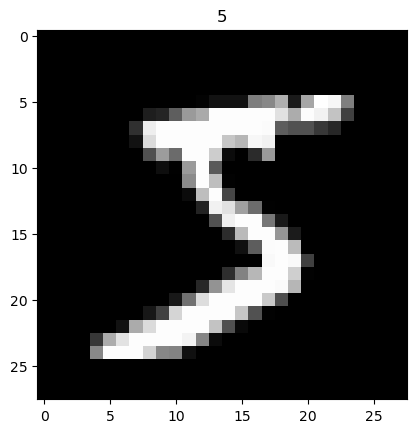

In [4]:
def export_csv(net, ext=""):
    df_biases_a1 = pd.DataFrame(net.biases[0])
    df_biases_a2 = pd.DataFrame(net.biases[1])
    df_biases_o = pd.DataFrame(net.biases[2])
    
    df_weight_a1 = pd.DataFrame(net.weights[0])
    df_weight_a2 = pd.DataFrame(net.weights[1])
    df_weight_o = pd.DataFrame(net.weights[2])

    df_biases_a1.to_csv(f'../data/biases_a1{ext}.csv', index=False)
    df_biases_a2.to_csv(f'../data/biases_a2{ext}.csv' , index=False)
    df_biases_o.to_csv(f'../data/biases_o{ext}.csv', index=False)

    df_weight_a1.to_csv(f'../data/weights_a1{ext}.csv', index=False)
    df_weight_a2.to_csv(f'../data/weights_a2{ext}.csv', index=False)
    df_weight_o.to_csv(f'../data/weights_o{ext}.csv', index=False)

def plot_image(i):
    plt.imshow(images[i,:].reshape(28,28), cmap="gray")
    plt.title(labels[i])
    plt.show()
plot_image(0)

In [5]:
net = NeuralNet([784, 300, 300, 10])
print(np.shape(net.biases[0]))
print(np.shape(net.biases[1]))
print(np.shape(net.biases[2]))

print(np.shape(net.weights[0]))
print(np.shape(net.weights[1]))
print(np.shape(net.weights[2]))
export_csv(net, "_init")

(300,)
(300,)
(10,)
(300, 784)
(300, 300)
(10, 300)


0.1113

In [ ]:
%%time
#Evaluate the model before training
net.evaluate((test_labels, test_images))

In [6]:
%%time
net.train(training_data=(training_labels, training_images), iterations=1, batch_size=10, learning_rate=0.1)
net.evaluate((test_labels, test_images))

CPU times: total: 1min 27s
Wall time: 1min 31s


0.9108

In [7]:
#export final weights and biases for use elsewhere
export_csv(net)